In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import sympy as sm
x = sm.symbols("x")

# Newton-Raphson Function Solver

1. Input your function

In [24]:
def derivative_finder():
    s = input()
    f = sm.sympify(s)
    df = sm.diff(f, x)
    print(f"Your function is {f}")
    print(f"The derivative of {f} is {df}")

    return f, df, s

f, df, s = derivative_finder()

Your function is sqrt((2*x + 3)**5 - 7)
The derivative of sqrt((2*x + 3)**5 - 7) is 5*(2*x + 3)**4/sqrt((2*x + 3)**5 - 7)


2. Input your guess and the number of times you wish to iterate

In [25]:
def input_guess():
    a = input()
    g = float(a)
    print(f"Your guess is {g}. Now please type how many times you want to iterate")
    n = int(input())
    print(f"You want to iterate {n} times")
    return g, n

g, n = input_guess()

Your guess is 10.0. Now please type how many times you want to iterate
You want to iterate 100 times


In [32]:
def guesser(g, n):
    guess = []
    NoSols = False
    for i in range(0, n):
        fsub = f.subs(x,g)
        dfsub = df.subs(x, g)
        g = g -  (fsub / dfsub)
        guess.append(g)
        print("Iteration " + str(i+1) + " = " + str(g))
        if round(fsub,10) == 0:
            break
        elif i == n-1 and round(fsub,10) != 0:
            print("No solutions could be found!")
            NoSols = True
            break
    return guess, NoSols

guess, NoSols = guesser(g,n)

Iteration 1 = 5.40000500284090
Iteration 2 = 2.64004160376002
Iteration 3 = 0.984322806513592
Iteration 4 = -0.00710923700501909
Iteration 5 = -0.586650003484094
Iteration 6 = -0.826254150598938
Iteration 7 = -0.671109810402803
Iteration 8 = -0.817304164452446
Iteration 9 = -0.687573616542581
Iteration 10 = -0.811694104048202
Iteration 11 = -0.697180325943480
Iteration 12 = -0.807670533566741
Iteration 13 = -0.703749839669031
Iteration 14 = -0.804574217775431
Iteration 15 = -0.708629719438264
Iteration 16 = -0.802083206782457
Iteration 17 = -0.712447761168350
Iteration 18 = -0.800016231802701
Iteration 19 = -0.715544448070138
Iteration 20 = -0.798261391071464
Iteration 21 = -0.718123570894170
Iteration 22 = -0.796744948740279
Iteration 23 = -0.720315940033585
Iteration 24 = -0.795415880256383
Iteration 25 = -0.722210046728189
Iteration 26 = -0.794237500810998
Iteration 27 = -0.723868260005280
Iteration 28 = -0.793182611093662
Iteration 29 = -0.725336012458236
Iteration 30 = -0.79223052

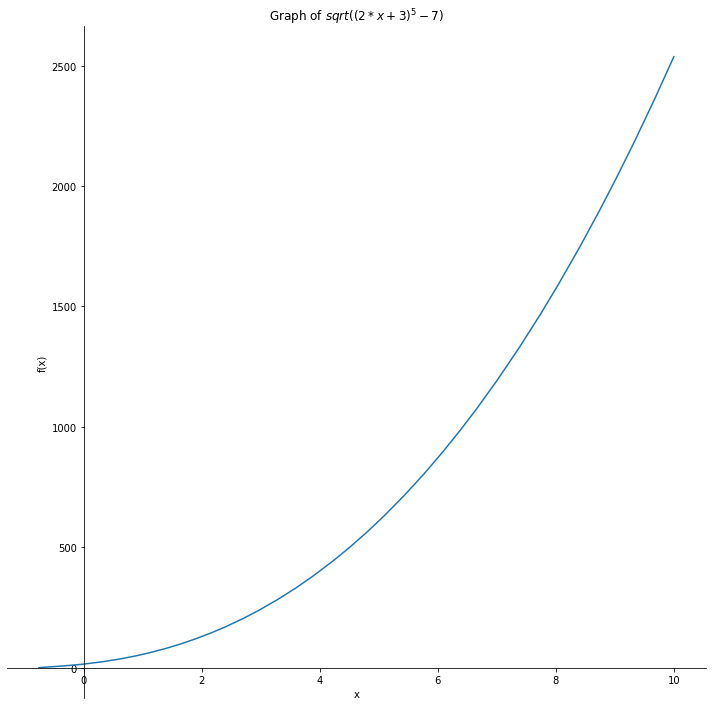

In [34]:
def plotter(f, guess, NoSols):

    if NoSols == False:
        guess_y = [f.subs('x', g).evalf() for g in guess]
        sm.plot(f, markers=[{'args': [guess, guess_y, 'ro']}], title = f"Graph of ${s}$",size = (10,10))
    else:
        sm.plot(f, title = f"Graph of ${s}$", size = (10,10))
    
plotter(f,guess,NoSols)